In [20]:
from qiskit import *
import numpy as np
from qiskit.circuit.library.standard_gates import RYGate

In [2]:
import math

vetor = [math.sqrt(0.03), math.sqrt(0.07), math.sqrt(0.15), math.sqrt(0.05), math.sqrt(0.1), math.sqrt(0.3), math.sqrt(0.2), math.sqrt(0.1)]
normas = []

for i in range(0, 8, 2):
    normas.append(math.sqrt(vetor[i]**2 + vetor[i+1]**2))

for i in range(0, 4, 2):
    normas.append(math.sqrt(normas[i]**2 + normas[i+1]**2))

normas.append(math.sqrt(normas[len(normas) - 1]**2 + normas[len(normas) - 2]**2))

alphas = []
alphas.append(2 * math.asin(normas[5] / normas[6]))
alphas.append(2 * math.asin(normas[1] / normas[4]))
alphas.append(2 * math.asin(normas[3] / normas[5]))

for i in range(0, 4, 1):
    alphas.append(2 * math.asin(vetor[1 + (2 * i)] / normas[i]))

#print(alphas)
#print(normas)

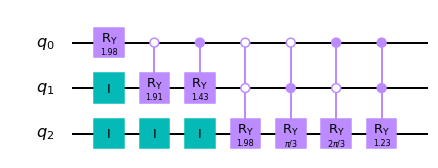

In [38]:
# circuito quantico

q = QuantumRegister(3, name='q')
circuit = QuantumCircuit(q)

# camada 1
circuit.ry(alphas[0], 0)
circuit.i(1)
circuit.i(2)

# camada 2
circuit.append(qiskit.circuit.library.CRYGate(alphas[1], None, 0), [0, 1], [])
circuit.i(2)

# camada 3
circuit.append(qiskit.circuit.library.CRYGate(alphas[2], None, 1), [0, 1], [])
circuit.i(2)

# camada 4
circuit.append(RYGate(alphas[3]).control(2, None, '00'), [1, 0, 2])

# camada 5
circuit.append(RYGate(alphas[4]).control(2, None, '01'), [1, 0, 2])

# camada 6
circuit.append(RYGate(alphas[5]).control(2, None, '10'), [1, 0, 2])

# camada 7
circuit.append(RYGate(alphas[6]).control(2, None, '11'), [1, 0, 2])

circuit.draw('mpl')

In [39]:
# rodando pra checar
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend)
result = job.result()

print('Estado gerado pelo circuito: ', result.get_statevector())

Estado gerado pelo circuito:  [0.17320508+0.j 0.31622777+0.j 0.38729833+0.j 0.4472136 +0.j
 0.26457513+0.j 0.54772256+0.j 0.2236068 +0.j 0.31622777+0.j]


In [40]:
print(vetor)

[0.17320508075688773, 0.2645751311064591, 0.3872983346207417, 0.22360679774997896, 0.31622776601683794, 0.5477225575051661, 0.4472135954999579, 0.31622776601683794]
